In [ ]:
#mounting drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive/My Drive/House Pricing

/content/gdrive/My Drive/House Pricing


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:
#load the data
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#check the number of rows and columns present in the dataset
data.shape

(1460, 81)

In [ ]:
# print the names of columns in the dataset 
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


1.   We can see that there are missing values in few columns
2.   We can also see that almost half column names are missing which says almost half of the columns contains text in them.




We will take Saleprice as 'Y' for the above dataset

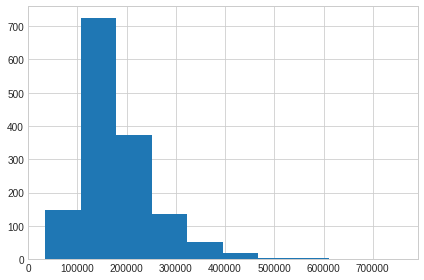

In [ ]:
#visualizinng the Y values
data["SalePrice"].hist()

In [ ]:
X = data.drop('SalePrice',axis = 1)
Y = data["SalePrice"]

Checking if there are columns with categories. If yes, what are the values

In [ ]:
X.nunique().sort_values()[:15] 

CentralAir      2
Street          2
Alley           2
Utilities       2
GarageFinish    3
BsmtHalfBath    3
PavedDrive      3
HalfBath        3
LandSlope       3
PoolQC          3
BsmtExposure    4
LotShape        4
Fence           4
MiscFeature     4
BsmtCond        4
dtype: int64

In [ ]:
cols = list(X.columns)
low_cardinality_cols = [col for col in cols if X[col].nunique() <= 15]

for col in low_cardinality_cols:
   print(col,X[col].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' '

### Cleaning the dataset

In [ ]:
#get the number of missing data points per column
missing_values_count = X.isnull().sum()

# look at the number of missing points in the first fifteen columns
missing_values_count.sort_values(ascending = False)[0:15]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(X.shape)
total_missing = missing_values_count.sum()

# number of columns with missing values  
columns_with_na_dropped = X.dropna(axis=1)

# just how much data will we lose if we drop all the columns with null values?
print("Total columns with null values: %d" %  (X.shape[1]-columns_with_na_dropped.shape[1]) ,'\n')

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

Total columns with null values: 19 

5.9631849315068495


There are a total of 1460 values and missing more than 1000 values makes no sense so the columns with more than 1000 missing values are dropped

In [ ]:
X = X.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [ ]:
#Check the percent of data missing now
percent_missing = (X.isnull().sum().sum()/np.product(X.shape)) * 100
print(percent_missing)

1.404109589041096


In [ ]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [ ]:
X = impute(X)

In [ ]:
#Check if the function worked correct or not
percent_missing = (X.isnull().sum().sum()/np.product(X.shape)) * 100
print(percent_missing)

0.0


### Creating New Features

In [ ]:
X["LivLotRatio"] = X['GrLivArea']/X['LotArea']
X["Spaciousness"] = (X['1stFlrSF']+X['2ndFlrSF'])/X['TotRmsAbvGrd']
X["TotalOutsideSF"] = X['WoodDeckSF']+X['OpenPorchSF']+X['EnclosedPorch']+X['3SsnPorch']+X['ScreenPorch']

In [ ]:
features = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
X["PorchTypes"] = X[features].gt(0).sum(axis=1)

In [ ]:
X["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")  

In [ ]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LivLotRatio,Spaciousness,TotalOutsideSF,PorchTypes,MedNhbdArea
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,0.202367,213.750000,61,1,1500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,0.131458,210.333333,298,1,1437.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,0.158756,297.666667,42,1,1500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,0.179791,245.285714,307,2,1717.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,0.154137,244.222222,276,2,2418.0


### Encoding the data

In [ ]:
object_cols = [col for col in X.columns if X[col].dtype == "object"]

from sklearn.preprocessing import LabelEncoder

# Apply label encoder 
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
#Checking the datatypes for confirmation
X.dtypes

Id                  int64
MSSubClass          int64
MSZoning            int64
LotFrontage       float64
LotArea             int64
                   ...   
LivLotRatio       float64
Spaciousness      float64
TotalOutsideSF      int64
PorchTypes          int64
MedNhbdArea       float64
Length: 81, dtype: object

### Using mutual information to discard the unwanted features.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y)
mi_scores[::5]

OverallQual      0.552689
YearBuilt        0.363224
BsmtQual         0.316996
GarageYrBlt      0.256464
LotFrontage      0.205776
Exterior2nd      0.163167
Exterior1st      0.141874
PorchTypes       0.110662
SaleType         0.088772
SaleCondition    0.080800
GarageCond       0.056418
KitchenAbvGr     0.035661
BsmtFullBath     0.014993
LandSlope        0.009468
MiscVal          0.002079
3SsnPorch        0.000000
Id               0.000000
Name: MI Scores, dtype: float64

In [ ]:
list(mi_scores)

[0.5526891306678743,
 0.512167684291466,
 0.4824555018487722,
 0.47364294726699274,
 0.3649101378517545,
 0.3632237352726877,
 0.3605712604564699,
 0.3573995384459041,
 0.33109842511240095,
 0.3220329829499391,
 0.3169960650496366,
 0.31009611577114216,
 0.2717979539158204,
 0.26591591733680287,
 0.2632019589115311,
 0.2564638688207639,
 0.24857124166835742,
 0.24780390326730606,
 0.21353888327415582,
 0.21251015148812247,
 0.2057761504089406,
 0.20387276782710662,
 0.20123175094934798,
 0.19545008472617553,
 0.16947324566244193,
 0.16316742149511132,
 0.15808369585824256,
 0.15643204839258118,
 0.1553593802077491,
 0.1468188004651001,
 0.14187420560918929,
 0.14103646779541235,
 0.12523440201716918,
 0.12443358279424355,
 0.11715892279674467,
 0.11066219818827472,
 0.10919281999535668,
 0.0936022313072411,
 0.09346629804545392,
 0.09312426453741152,
 0.08877175940735449,
 0.08861747235747508,
 0.08608063110996067,
 0.0860430656583775,
 0.08522334168009138,
 0.0808002235293721,
 0.0805

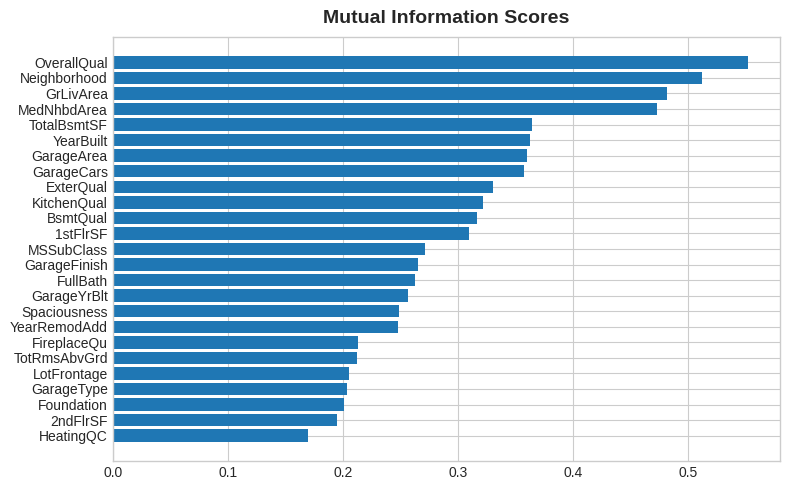

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(25))

In [ ]:
def drop_uninformative(data, mi_scores):
    return data.loc[:, mi_scores > 0.01]


X = drop_uninformative(X, mi_scores)
X.shape

(1460, 65)

### Models - Supervised and Unsupervised

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
#use KNeighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier( n_neighbors = 5, metric = 'minkowski', p=2)
knn.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error as MSE

pred_knn = knn.predict(X_test)
mse_knn = MSE(Y_test, pred_knn, squared = False)
mse_knn

60004.690977513164

In [ ]:
#using Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 )
tree.fit(X_train, Y_train)

pred_dt = tree.predict(X_test)
mse_dt = MSE(Y_test, pred_dt, squared = False)
mse_dt

47935.3512452213

In [ ]:
#use Randomforest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomforest.fit(X_train, Y_train)

pred_rf = randomforest.predict(X_test)
mse_rf = MSE(Y_test, pred_rf, squared = False)
mse_rf

59235.337604188535

In [ ]:
#use GaussianNB
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)

pred_gnb = gaussian.predict(X_test)
mse_gnb = MSE(Y_test, pred_gnb, squared = False)
mse_gnb

38099.81186186605

In [ ]:
#use SVC (linear Kernel)
from sklearn.svm import SVC

svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

pred_lin = svc_lin.predict(X_test)
mse_lin = MSE(Y_test, pred_lin, squared = False)
mse_lin

43835.94420579644

In [ ]:
#use SVC (RBF Kernel)
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

pred_rbf = svc_rbf.predict(X_test)
mse_rbf = MSE(Y_test, pred_rbf, squared = False)
mse_rbf

73247.83743269915

In [ ]:
#use XGBregressor
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,Y_train)

pred_xgb = xgbr.predict(X_test)
mse_xgb = MSE(Y_test, pred_xgb, squared = False)
mse_xgb

[11:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


23486.40802725499

In [ ]:
# Importing Modules
from sklearn.cluster import KMeans

# Declaring Model
kmeans = KMeans(n_clusters=5)

kmeans.fit(X_train,Y_train)
pred_km = kmeans.predict(X_test)

mse_km = MSE(Y_test, pred_km, squared = False)
mse_km

190661.13949641451

In [ ]:
#Printing the RMSE values
print('K Neighbors : ', mse_knn)
print('Decision Tree : ', mse_dt)
print('Random Forest : ', mse_rf)
print('SVC Linear : ', mse_lin)
print('SVC RBF : ', mse_rbf)
print('Gaussian : ', mse_gnb)
print('XGBregressor :', mse_xgb)
print('Kmeans :', mse_km)

K Neighbors :  60004.690977513164
Decision Tree :  47935.3512452213
Random Forest :  59235.337604188535
SVC Linear :  43835.94420579644
SVC RBF :  73247.83743269915
Gaussian :  38099.81186186605
XGBregressor : 23486.40802725499
Kmeans : 190661.13949641451
